## Data analysis



In [1]:
import pandas as pd
import seaborn as sns
import re

In [2]:
full_dataset2 = pd.read_csv('datasets\\full_dataset_2.csv')
full_dataset3 = pd.read_csv('datasets\\full_dataset_3.csv')

In [3]:
f = open("datasets\\lista-palavroes-bloqueio.txt", "r", encoding="utf8")
list_bad_words = f.readlines()
list_bad_words = [x.strip() for x in list_bad_words]
f.close()


def count_swear_words(text):
    bad = []
    text = text.split(' ')
    for bad_word in list_bad_words:
        try:
            x = [re.findall('^' + bad_word.lower(), word) for word in text]
            x = [y for y in x if y != []]
            if x != []:
                bad.append(x[0][0])
        except:
            pass
    if bad != []:
        bad = set(bad) # get the unique values
    return len(bad)

In [4]:
# get common portuguese laughts online, like kkkkk, hahaha, hehe and rsrs
laughs = "k{2,}|a*ha+h[ha]*|e*he+h[he]*|s*rs+r[rs]*" # get regex for laughs
def count_laughs(text):
    all_laughs = re.findall(laughs, text)
    all_laughs = ''.join(all_laughs)
    return len(all_laughs)

<AxesSubplot:xlabel='hate_speech', ylabel='swear_words'>

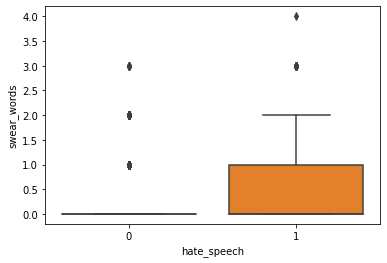

In [5]:
full_dataset2['swear_words'] = full_dataset2['text'].apply(count_swear_words)
sns.boxplot(x='hate_speech', y='swear_words', data=full_dataset2)

<AxesSubplot:xlabel='hate_speech', ylabel='laughs'>

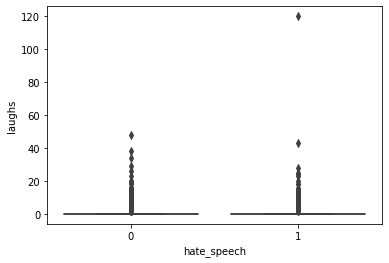

In [6]:
full_dataset2['laughs'] = full_dataset2['text'].apply(count_laughs)
sns.boxplot(x='hate_speech', y='laughs', data=full_dataset2)

<AxesSubplot:xlabel='hate_speech', ylabel='swear_words'>

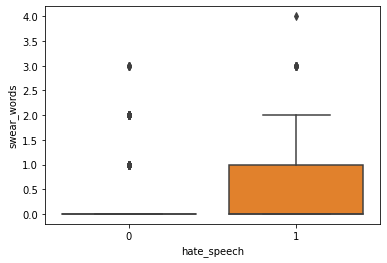

In [7]:
full_dataset3['swear_words'] = full_dataset3['text'].apply(count_swear_words)
sns.boxplot(x='hate_speech', y='swear_words', data=full_dataset3)

<AxesSubplot:xlabel='hate_speech', ylabel='laughs'>

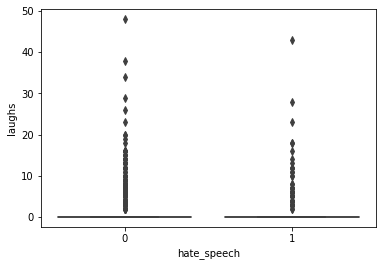

In [8]:
full_dataset3['laughs'] = full_dataset3['text'].apply(count_laughs)
sns.boxplot(x='hate_speech', y='laughs', data=full_dataset3)